In [2]:
import pandas as pd
import numpy as np

## Chile death records

Individual death certificates were retrieved from the Chilean department of statistics and health information  with detail on the commune of residency, date, and cause of death.

Link to download dataset: https://deis.minsal.cl/#datosabiertos

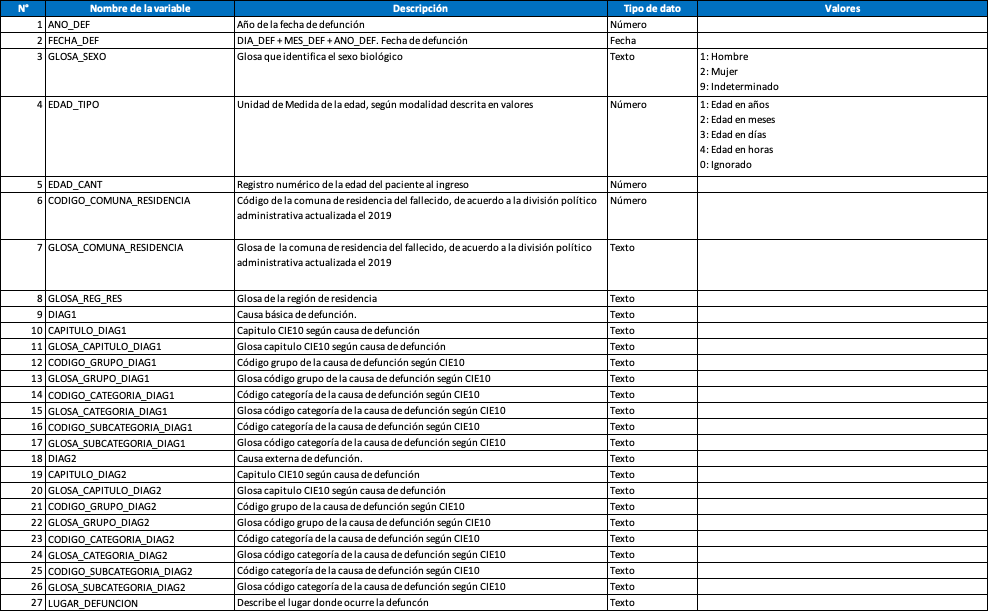

In [3]:
df = pd.read_csv('../../STA250/DEFUNCIONES_FUENTE_DEIS_1990_2019_CIFRAS_OFICIALES.csv',
                 delimiter=";", 
                 encoding='latin1',
                 header=None)

cols = [
    "ANO_DEF", "FECHA_DEF", "GLOSA_SEXO",
    "EDAD_TIPO", "EDAD_CANT", "CODIGO_COMUNA_RESIDENCIA",
    "GLOSA_COMUNA_RESIDENCIA", "GLOSA_REG_RES", "DIAG1",
    "CAPITULO_DIAG1", "GLOSA_CAPITULO_DIAG1", "CODIGO_GRUPO_DIAG1",
    "GLOSA_GRUPO_DIAG1", "CODIGO_CATEGORIA_DIAG1", "GLOSA_CATEGORIA_DIAG1",
    "CODIGO_SUBCATEGORIA_DIAG1", "GLOSA_SUBCATEGORIA_DIAG1","DIAG2"
    ,"CAPITULO_DIAG2","GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2"
    ,"GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2","GLOSA_CATEGORIA_DIAG2"
    ,"CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2","LUGAR_DEFUNCION"
]
df.columns = cols

print(df.shape)
df.head()

/tmp/ipykernel_98041/2228149132.py:1: DtypeWarning: Columns (9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../STA250/DEFUNCIONES_FUENTE_DEIS_1990_2019_CIFRAS_OFICIALES.csv',


(2659458, 27)


,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
0,1994,1994-10-22,Hombre,1.0,17,8304,Laja,Del Bíobío,8629,NaN,...,966X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
1,1995,1995-04-15,Hombre,1.0,50,6115,Rengo,Del Libertador B. O'Higgins,9941,NaN,...,9109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
2,1995,1995-04-09,Hombre,1.0,50,13108,Independencia,Metropolitana de Santiago,9941,NaN,...,984X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
3,1995,1995-08-31,Hombre,1.0,35,8101,Concepción,Del Bíobío,8540,NaN,...,8147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
4,1995,1995-09-11,Hombre,1.0,36,7301,Curicó,Del Maule,9893,NaN,...,9506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica


In [4]:
df['GLOSA_COMUNA_RESIDENCIA'].value_counts().shape, df['CODIGO_COMUNA_RESIDENCIA'].value_counts().shape

((347,), (347,))

In [5]:
df['EDAD_TIPO'].value_counts()

EDAD_TIPO
1.0    2587361
2.0      26714
3.0      23822
4.0      21546
9.0         12
0.0          2
Name: count, dtype: int64

## Elderly 65+ All causes excluding external causes

- Excluding rows where column 'GLOSA_CAPITULO_DIAG2' is equal to 'Causas externas de morbilidad y de mortalidad'

In [6]:
df_old = df[(df['EDAD_TIPO'] == 1) & (df['EDAD_CANT'] >= 65)]

print(df_old.shape)

df_old.head()

(1782708, 27)


,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
7,1994,NaN,Hombre,1.0,70,7304,Molina,Del Maule,9941,NaN,...,9109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
13,1996,1996-05-15,Hombre,1.0,82,9111,Nueva Imperial,De La Araucanía,8070,NaN,...,8147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
19,1995,1995-06-03,Hombre,1.0,68,5503,Hijuelas,De Valparaíso,8690,NaN,...,8147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
20,1995,1995-05-31,Hombre,1.0,99,10101,Puerto Montt,De Los Lagos,9941,NaN,...,984X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
30,1994,NaN,Hombre,1.0,65,8101,Concepción,Del Bíobío,9941,NaN,...,984X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro


In [7]:
df_old_all = df_old[~df_old['GLOSA_CAPITULO_DIAG2'].isin(['Causas externas de morbilidad y de mortalidad'])]

print(df_old_all.shape)
df_old_all.head()

(1740118, 27)


,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
7,1994,NaN,Hombre,1.0,70,7304,Molina,Del Maule,9941,NaN,...,9109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
13,1996,1996-05-15,Hombre,1.0,82,9111,Nueva Imperial,De La Araucanía,8070,NaN,...,8147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
19,1995,1995-06-03,Hombre,1.0,68,5503,Hijuelas,De Valparaíso,8690,NaN,...,8147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
20,1995,1995-05-31,Hombre,1.0,99,10101,Puerto Montt,De Los Lagos,9941,NaN,...,984X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
30,1994,NaN,Hombre,1.0,65,8101,Concepción,Del Bíobío,9941,NaN,...,984X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro


### Death count per quarter and month

In [8]:
def aggregate_by_comunne(df, death_column_name='Death_count_all_cause'):

    df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'])


    df_commune_time = df.groupby([df['CODIGO_COMUNA_RESIDENCIA'], 
                                        df['FECHA_DEF'].dt.year,
                                        df['FECHA_DEF'].dt.to_period('Q'),
                                        df['FECHA_DEF'].dt.month,
                                        df['GLOSA_SEXO']]).agg(
        {
            'EDAD_TIPO': 'count'
        })

    df_commune_time.index.names = ['CODIGO_COMUNA_RESIDENCIA', 'Year', 'Quarter', 'Month', 'Gender']

    df_commune_time = df_commune_time.rename(columns={'EDAD_TIPO': death_column_name})

    df_commune_time = df_commune_time.reset_index()

    df_commune_time['Quarter'] = df_commune_time['Quarter'].apply(lambda x: str(x)[-1]) 

    return df_commune_time

df_old_all_commune = aggregate_by_comunne(df_old_all)

print(df_old_all_commune.shape)
df_old_all_commune.head(40)

/tmp/ipykernel_98041/142502485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'])


(200962, 6)


,CODIGO_COMUNA_RESIDENCIA,Year,Quarter,Month,Gender,Death_count_all_cause
0,1101,1990.0,1,1.0,Hombre,15
1,1101,1990.0,1,1.0,Mujer,7
2,1101,1990.0,1,2.0,Hombre,11
3,1101,1990.0,1,2.0,Mujer,11
4,1101,1990.0,1,3.0,Hombre,14
5,1101,1990.0,1,3.0,Mujer,16
6,1101,1990.0,2,4.0,Hombre,19
7,1101,1990.0,2,4.0,Mujer,15
8,1101,1990.0,2,5.0,Hombre,19
9,1101,1990.0,2,5.0,Mujer,20


## Elderly 65+ Only external causes

- Including only rows where column 'GLOSA_CAPITULO_DIAG2' is equal to 'Causas externas de morbilidad y de mortalidad'

In [9]:
df_old_external = df_old[df_old['GLOSA_CAPITULO_DIAG2'].isin(['Causas externas de morbilidad y de mortalidad'])]

print(df_old_external.shape)
df_old_external.head()

(42590, 27)


,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
1259,1998,1998-05-03,Hombre,1.0,70,13108,Independencia,Metropolitana de Santiago,T293,S00-T98,...,Y264,V01-Y98,Causas externas de morbilidad y de mortalidad,Y10-Y34,Eventos de intención no determinada,Y26,"Exposición al humo, fuego y llamas, de intenci...",Y264,EXPOSICIÓN A HUMO FUEGO Y LLAMAS DE INTENCIÓN ...,Otro
1261,2005,NaN,Hombre,1.0,75,9101,Temuco,De La Araucanía,T751,S00-T98,...,W748,V01-Y98,Causas externas de morbilidad y de mortalidad,W65-W74,Ahogamiento y sumersión accidentales,W74,Ahogamiento y sumersión no especificados,W748,AHOGAMIENTO Y SUMERSIÓN NO ESPECIFICADOS OCURR...,Otro
1285,1998,1998-02-28,Hombre,1.0,65,13108,Independencia,Metropolitana de Santiago,T303,S00-T98,...,Y269,V01-Y98,Causas externas de morbilidad y de mortalidad,Y10-Y34,Eventos de intención no determinada,Y26,"Exposición al humo, fuego y llamas, de intenci...",Y269,EXPOSICIÓN A HUMO FUEGO Y LLAMAS DE INTENCIÓN ...,Otro
1340,2004,2004-12-05,Hombre,1.0,75,5201,Isla de Pascua,De Valparaíso,T751,S00-T98,...,W748,V01-Y98,Causas externas de morbilidad y de mortalidad,W65-W74,Ahogamiento y sumersión accidentales,W74,Ahogamiento y sumersión no especificados,W748,AHOGAMIENTO Y SUMERSIÓN NO ESPECIFICADOS OCURR...,Otro
1746,1997,1997-05-28,Mujer,1.0,68,5109,Viña del Mar,De Valparaíso,S069,S00-T98,...,X594,V01-Y98,Causas externas de morbilidad y de mortalidad,X58-X59,Exposición accidental a otros factores y a los...,X59,Exposición a factores no especificados,X594,EXPOSICIÓN A FACTORES NO ESPECIFICADOS QUE CAU...,Otro


### Death count per quarter and month

In [10]:
df_old_external_commune = aggregate_by_comunne(df_old_external,
                                               death_column_name='Death_count_external')

print(df_old_external_commune.shape)
df_old_external_commune.head(40)

/tmp/ipykernel_98041/142502485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'])


(32191, 6)


,CODIGO_COMUNA_RESIDENCIA,Year,Quarter,Month,Gender,Death_count_external
0,1101,1997.0,1,1.0,Hombre,1
1,1101,1997.0,1,2.0,Mujer,1
2,1101,1997.0,1,3.0,Hombre,2
3,1101,1997.0,2,4.0,Hombre,1
4,1101,1997.0,2,5.0,Mujer,1
5,1101,1997.0,2,6.0,Hombre,1
6,1101,1997.0,3,7.0,Mujer,2
7,1101,1997.0,3,8.0,Hombre,1
8,1101,1997.0,3,8.0,Mujer,1
9,1101,1997.0,4,10.0,Hombre,1


## Elderly 65+ Respiratory/Cardiovascular causes

- Including only respiratory/cardiovascular death related 

In [11]:
df_old.groupby(['CAPITULO_DIAG1']).agg({'GLOSA_CAPITULO_DIAG1': 'unique'})

,GLOSA_CAPITULO_DIAG1
CAPITULO_DIAG1,
A00-B99,[Ciertas enfermedades infecciosas y parasitarias]
C00-D48,[Tumores [Neoplasias]]
D50-D89,[Enfermedades de la sangre y de los órganos he...
E00-E90,"[Enfermedades endocrinas, nutricionales y meta..."
F00-F99,[Trastornos mentales y del comportamiento]
G00-G99,[Enfermedades del sistema nervioso central]
H00-H59,[Enfermedades del ojo y sus anexos ]
H60-H95,[Enfermedades del oído y de la apófisis mastoi...
I00-I99,[Enfermedades del sistema circulatorio ]


- Selecting deaths related to:
    - circulatory system
        - ICD-10: I00-I99
    - respiratory system 
        - ICD10: J00-J99
        
It can be changed to specific respiratory/cardiovascular diseases

In [12]:
df_old_cr = df_old[df_old['CAPITULO_DIAG1'].isin(['I00-I99', 'J00-J99'])]

print(df_old_cr.shape)
df_old_cr.head()

(657107, 27)


,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
527033,2005,2005-07-23,Mujer,1.0,71,16101,Chillán,De Ñuble,I219,I00-I99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
542395,2004,2004-06-10,Hombre,1.0,77,10301,Osorno,De Los Lagos,I832,I00-I99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
543961,2004,2004-05-13,Hombre,1.0,81,13118,Macul,Metropolitana de Santiago,I110,I00-I99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
544404,2004,2004-08-04,Hombre,1.0,83,6310,Santa Cruz,Del Libertador B. O'Higgins,I64X,I00-I99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
544476,2004,2004-08-09,Hombre,1.0,82,13110,La Florida,Metropolitana de Santiago,I64X,I00-I99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica


In [13]:
df_old_cr['GLOSA_CAPITULO_DIAG1'].value_counts()

GLOSA_CAPITULO_DIAG1
Enfermedades del sistema circulatorio     468092
Enfermedades del sistema respiratorio     189015
Name: count, dtype: int64

### Cardiovascular/Respiratory Death count per quarter and month

In [14]:
df_old_cr_commune = aggregate_by_comunne(df_old_cr,
death_column_name='Death_count_cardioRespiratory')

print(df_old_cr_commune.shape)
df_old_cr_commune.head(40)

/tmp/ipykernel_98041/142502485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'])


(129641, 6)


,CODIGO_COMUNA_RESIDENCIA,Year,Quarter,Month,Gender,Death_count_cardioRespiratory
0,1101,1997.0,1,1.0,Hombre,8
1,1101,1997.0,1,1.0,Mujer,7
2,1101,1997.0,1,2.0,Hombre,11
3,1101,1997.0,1,2.0,Mujer,10
4,1101,1997.0,1,3.0,Hombre,3
5,1101,1997.0,1,3.0,Mujer,14
6,1101,1997.0,2,4.0,Hombre,6
7,1101,1997.0,2,4.0,Mujer,13
8,1101,1997.0,2,5.0,Hombre,9
9,1101,1997.0,2,5.0,Mujer,9


### Cardiovascular only Death count per quarter and month

In [15]:
df_old_cardio = df_old[df_old['CAPITULO_DIAG1'].isin(['I00-I99'])]

df_old_cardio_commune = aggregate_by_comunne(df_old_cardio,
death_column_name='Death_count_cardio')

print(df_old_cardio_commune.shape)
df_old_cardio_commune.head(40)

/tmp/ipykernel_98041/142502485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'])


(115100, 6)


,CODIGO_COMUNA_RESIDENCIA,Year,Quarter,Month,Gender,Death_count_cardio
0,1101,1997.0,1,1.0,Hombre,6
1,1101,1997.0,1,1.0,Mujer,6
2,1101,1997.0,1,2.0,Hombre,7
3,1101,1997.0,1,2.0,Mujer,7
4,1101,1997.0,1,3.0,Hombre,3
5,1101,1997.0,1,3.0,Mujer,12
6,1101,1997.0,2,4.0,Hombre,3
7,1101,1997.0,2,4.0,Mujer,12
8,1101,1997.0,2,5.0,Hombre,9
9,1101,1997.0,2,5.0,Mujer,7


### Respiratory only Death count per quarter and month

In [16]:
df_old_respi = df_old[df_old['CAPITULO_DIAG1'].isin(['J00-J99'])]

df_old_respi_commune = aggregate_by_comunne(df_old_respi,
death_column_name='Death_count_respiratory')

print(df_old_respi_commune.shape)
df_old_respi_commune.head(40)

/tmp/ipykernel_98041/142502485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'])


(78926, 6)


,CODIGO_COMUNA_RESIDENCIA,Year,Quarter,Month,Gender,Death_count_respiratory
0,1101,1997.0,1,1.0,Hombre,2
1,1101,1997.0,1,1.0,Mujer,1
2,1101,1997.0,1,2.0,Hombre,4
3,1101,1997.0,1,2.0,Mujer,3
4,1101,1997.0,1,3.0,Mujer,2
5,1101,1997.0,2,4.0,Hombre,3
6,1101,1997.0,2,4.0,Mujer,1
7,1101,1997.0,2,5.0,Mujer,2
8,1101,1997.0,2,6.0,Hombre,3
9,1101,1997.0,2,6.0,Mujer,3


## Merge all death count 

In [17]:
df_old_final = df_old_all_commune.merge(df_old_external_commune,
                                        how='outer', 
                                        on=['CODIGO_COMUNA_RESIDENCIA', 'Year', 'Quarter', 'Month', 'Gender'])

df_old_final = df_old_final.merge(df_old_cr_commune,
                                        how='outer', 
                                        on=['CODIGO_COMUNA_RESIDENCIA', 'Year', 'Quarter', 'Month', 'Gender'])

df_old_final = df_old_final.merge(df_old_cardio_commune,
                                        how='outer', 
                                        on=['CODIGO_COMUNA_RESIDENCIA', 'Year', 'Quarter', 'Month', 'Gender'])

df_old_final = df_old_final.merge(df_old_respi_commune,
                                        how='outer', 
                                        on=['CODIGO_COMUNA_RESIDENCIA', 'Year', 'Quarter', 'Month', 'Gender'])

print(df_old_final.shape)
df_old_final.head(40)

(201996, 10)


,CODIGO_COMUNA_RESIDENCIA,Year,Quarter,Month,Gender,Death_count_all_cause,Death_count_external,Death_count_cardioRespiratory,Death_count_cardio,Death_count_respiratory
0,1101,1990.0,1,1.0,Hombre,15.0,NaN,NaN,NaN,NaN
1,1101,1990.0,1,1.0,Mujer,7.0,NaN,NaN,NaN,NaN
2,1101,1990.0,1,2.0,Hombre,11.0,NaN,NaN,NaN,NaN
3,1101,1990.0,1,2.0,Mujer,11.0,NaN,NaN,NaN,NaN
4,1101,1990.0,1,3.0,Hombre,14.0,NaN,NaN,NaN,NaN
5,1101,1990.0,1,3.0,Mujer,16.0,NaN,NaN,NaN,NaN
6,1101,1990.0,2,4.0,Hombre,19.0,NaN,NaN,NaN,NaN
7,1101,1990.0,2,4.0,Mujer,15.0,NaN,NaN,NaN,NaN
8,1101,1990.0,2,5.0,Hombre,19.0,NaN,NaN,NaN,NaN
9,1101,1990.0,2,5.0,Mujer,20.0,NaN,NaN,NaN,NaN


In [18]:
df_old_final['Age'] = np.full(df_old_final.shape[0], '65+')

df_old_final.head()

,CODIGO_COMUNA_RESIDENCIA,Year,Quarter,Month,Gender,Death_count_all_cause,Death_count_external,Death_count_cardioRespiratory,Death_count_cardio,Death_count_respiratory,Age
0,1101,1990.0,1,1.0,Hombre,15.0,NaN,NaN,NaN,NaN,65+
1,1101,1990.0,1,1.0,Mujer,7.0,NaN,NaN,NaN,NaN,65+
2,1101,1990.0,1,2.0,Hombre,11.0,NaN,NaN,NaN,NaN,65+
3,1101,1990.0,1,2.0,Mujer,11.0,NaN,NaN,NaN,NaN,65+
4,1101,1990.0,1,3.0,Hombre,14.0,NaN,NaN,NaN,NaN,65+


In [19]:
df_old_final.to_csv('../Data/chile_elderly_65+_all_cause_external_cardio_respiratory_mortality_count_commune_level_year_1990_2019_quarter_month.csv',
index=False)

In [22]:
df_old_final.sample(10)

,CODIGO_COMUNA_RESIDENCIA,Year,Quarter,Month,Gender,Death_count_all_cause,Death_count_external,Death_count_cardioRespiratory,Death_count_cardio,Death_count_respiratory,Age
162369,13127,1990.0,1,2.0,Hombre,19.0,NaN,NaN,NaN,NaN,65+
159686,13123,1997.0,4,10.0,Hombre,34.0,1.0,18.0,14.0,4.0,65+
86362,8109,1992.0,2,6.0,Mujer,1.0,NaN,NaN,NaN,NaN,65+
165986,13132,1990.0,4,10.0,Mujer,10.0,NaN,NaN,NaN,NaN,65+
116363,9203,1993.0,1,1.0,Mujer,3.0,NaN,NaN,NaN,NaN,65+
101788,9101,2007.0,4,12.0,Mujer,41.0,NaN,15.0,12.0,3.0,65+
60040,6306,2005.0,1,3.0,Hombre,3.0,NaN,1.0,1.0,NaN,65+
18646,4304,1998.0,2,6.0,Mujer,1.0,NaN,1.0,NaN,1.0,65+
50908,6114,1998.0,2,6.0,Mujer,3.0,NaN,NaN,NaN,NaN,65+
24761,5302,2002.0,4,12.0,Mujer,1.0,NaN,NaN,NaN,NaN,65+
